## Observations and Insights 

The first observation is that Capomulin and Ramicane are the most effective drugs tested in this study, reproducing similar results repeatedly. Capomulin had a correlation of 0.88 and Ramicane had an even better correlation of 0.96. These are far and away the best drugs for treating SCC.

<br>

Dropping one mouse because of duplication of data did not, in my mind, cause significant data loss as it was a mouse that was statistically similar to the other mice receiving treatment with Propriva. The 10 rows of data accounted for 0.5% of the data. The effectiveness of Propriva, according to the summary statistics, put it similar to Infubinol, which is to say, not as effective as Capomulin and Ramicane.

<br>

Turning this to practical applications, the number of mice treated seems high, but understanding that these studies often are done on a small scale and then the scale is increased when applied in secondary and human trials. But the results for Ramicane and Capomulin speak well for future use in treatment in humans.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge = pd.merge(mouse_metadata, study_results, how = "outer",on = "Mouse ID")

# Display the data table for preview
merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = merge["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge[merge.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
drop_mouse = merge.loc[merge.duplicated(["Mouse ID","Timepoint"],keep=False),:]
drop_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mouse_id = drop_mouse["Mouse ID"].unique()
drop_mouse_id
clean = merge[merge["Mouse ID"].isin(drop_mouse_id) == False].reset_index(drop=True)
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean["Mouse ID"].nunique()
clean_mouse_count

248

# Clean data set
One duplcation of experiment data was eliminated due. This was done in order to preserve data integrity. The dataset is still left with 248 viable mouse test subjects.

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM (Standard Error of Mean) of the tumor volume for each regimen
stat_table = clean[["Drug Regimen","Tumor Volume (mm3)"]].agg(
    {
    "Tumor Volume (mm3)":["mean","median","var","std","sem"]
    }
)

stat_table


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM (Standard Error of Mean) of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stat = clean.groupby("Drug Regimen").agg(
    {
    "Tumor Volume (mm3)":["mean","median","var","std","sem"]
    })
summary_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
stat_table2 = clean[["Drug Regimen","Tumor Volume (mm3)"]].agg(
    {
    "Tumor Volume (mm3)":["mean","median","var","std","sem"]
    }
)

stat_table2
# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_final = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_stat_final

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Summary Statistics per Drug Regimen
Each drug regimen has produced the above statistical data, showing mean, median, variance, standard deviation, and standard error of mean.

## Bar and Pie Charts

In [9]:
regimens = clean.groupby(["Drug Regimen"])
regimens
timepoints = regimens["Timepoint"].count()
timepoints
sexes = clean.groupby(["Sex"])
sexes
sex_split = sexes["Sex"].count()
sex_split

Sex
Female    922
Male      958
Name: Sex, dtype: int64

### The graphs below detail the total number of timepoints for all mice tested across each drug regimen

<AxesSubplot:xlabel='Drug Regimen'>

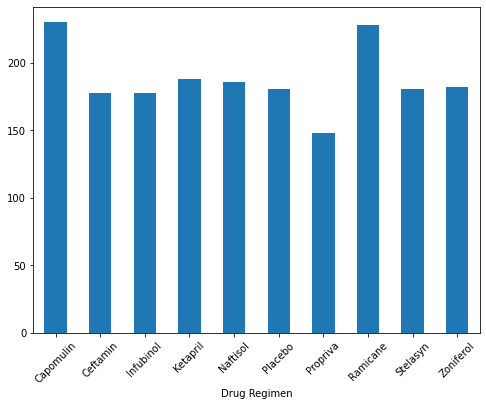

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot = timepoints.plot.bar(x="Drug Regimen",y="Timepoint",rot=45,figsize=(8,6))

plot

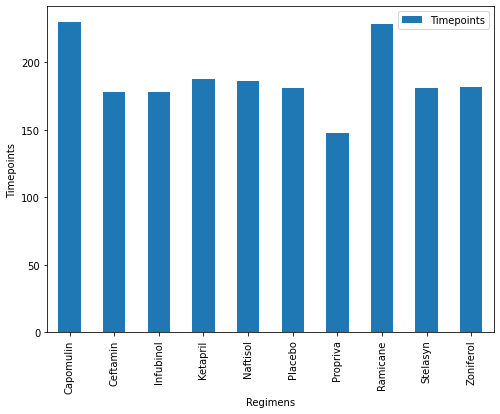

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints.plot(kind="bar", figsize = (8,6))

plt.xlabel("Regimens")
plt.ylabel("Timepoints")
plt.legend(['Timepoints'])

### The graphs below show the distribution of sexes between mice used during the trials

<AxesSubplot:ylabel='Sex'>

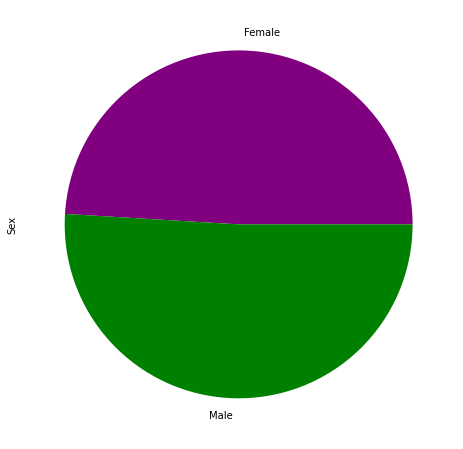

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = sex_split.plot.pie(y="Sex of Mice",figsize=(8,8),colors = ['purple', 'green'])
pie

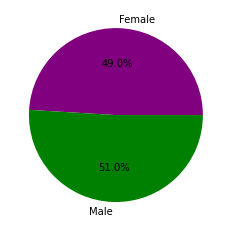

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["purple","green"]
labels = ["Female","Male"]
plt.pie(sex_split,labels = labels,colors=colors,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_df = clean.groupby("Mouse ID").max(["Timepoint"])
last_time_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_last_merged_df = pd.merge(last_time_df, clean, how = "inner",on = ["Mouse ID","Timepoint"])
clean_last_merged_df

,Mouse ID,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen,Sex,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,a203,20,23,45,67.973419,2,Infubinol,Female,20,23,67.973419,2
1,a251,21,25,45,65.525743,1,Infubinol,Female,21,25,65.525743,1
2,a262,17,29,45,70.717621,4,Placebo,Female,17,29,70.717621,4
3,a275,20,28,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3
4,a366,16,29,30,63.440686,1,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,z435,12,26,10,48.710661,0,Propriva,Female,12,26,48.710661,0
244,z578,11,16,45,45.000000,0,Ramicane,Male,11,16,30.638696,0
245,z581,24,25,45,62.754451,3,Infubinol,Female,24,25,62.754451,3
246,z795,13,29,45,65.741070,3,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for a for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']    

final_vol_dict = {}

for each in drug_list:
    # Create empty list to fill with tumor vol data (for plotting)
    tumor_vol = []
    outlier = False
    print(f"Regimen: {each}")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    current_drug_df = clean_last_merged_df.loc[clean_last_merged_df["Drug Regimen"] == each]
    tumor_vol = current_drug_df["Tumor Volume (mm3)_x"]
    final_vol_dict[each] = tumor_vol
    sorted_tumor_vol = tumor_vol.sort_values()
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = current_drug_df["Tumor Volume (mm3)_x"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # add subset 
    
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower bound: {lower_bound}, Upper Bound: {upper_bound}")
    for vol in tumor_vol:
        if vol < lower_bound:
            print(f"{vol} is below {lower_bound} and could be outlier.")
            outlier = True
        elif vol > upper_bound:
            print(f"{vol} is above {upper_bound} and could be outlier.")
            outlier = True
    if outlier == False:
        print("No outliers.")

final_vol_dict

Regimen: Capomulin
Lower bound: 42.376491720000004, Upper Bound: 49.37251379999999
No outliers.
Regimen: Ramicane
Lower bound: 42.984251445, Upper Bound: 48.359580925
No outliers.
Regimen: Infubinol
Lower bound: 36.83290494999999, Upper Bound: 82.74144559000001
No outliers.
Regimen: Ceftamin
Lower bound: 25.355449580000002, Upper Bound: 87.66645829999999
No outliers.


{'Capomulin': 19     45.651331
 24     45.000000
 61     45.000000
 64     46.304003
 66     46.809225
 80     47.685963
 83     45.595685
 85     48.158209
 87     46.408361
 108    48.070452
 115    46.154737
 121    45.000000
 124    46.414518
 162    46.539206
 163    45.781746
 169    47.373423
 174    45.000000
 180    45.000000
 183    46.749006
 192    47.212200
 204    45.704434
 208    45.000000
 220    45.893720
 226    45.473753
 239    45.000000
 Name: Tumor Volume (mm3)_x, dtype: float64,
 'Ramicane': 6      45.466677
 7      45.000000
 10     45.000000
 12     46.910892
 33     45.722279
 37     46.940945
 45     45.000000
 52     46.409084
 70     45.851531
 76     45.000000
 77     45.000000
 91     45.252534
 93     46.343832
 96     45.000000
 119    45.000000
 126    45.521875
 157    45.766111
 158    46.585433
 166    45.625802
 168    45.568211
 177    45.000000
 190    47.622816
 217    45.000000
 235    46.378092
 244    45.000000
 Name: Tumor Volume (mm3)_x, d

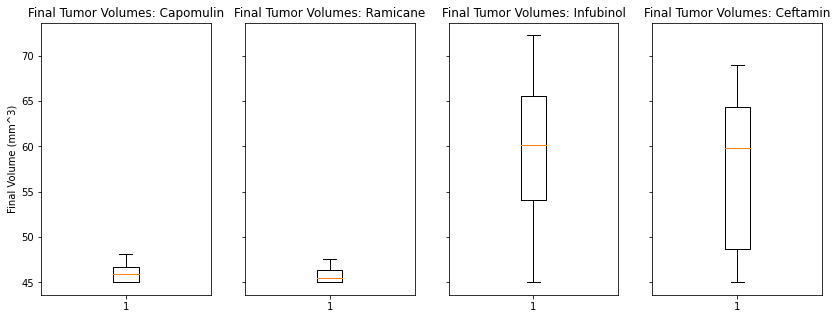

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = [14,5],sharey=True)
ax1.set_title('Final Tumor Volumes: Capomulin')
ax1.set_ylabel('Final Volume (mm^3)')
ax1.boxplot(final_vol_dict["Capomulin"])
ax2.set_title('Final Tumor Volumes: Ramicane')
ax2.boxplot(final_vol_dict["Ramicane"])
ax3.set_title('Final Tumor Volumes: Infubinol')
ax3.boxplot(final_vol_dict["Infubinol"])
ax4.set_title('Final Tumor Volumes: Ceftamin')
ax4.boxplot(final_vol_dict["Ceftamin"])

plt.show()

## Line and Scatter Plots

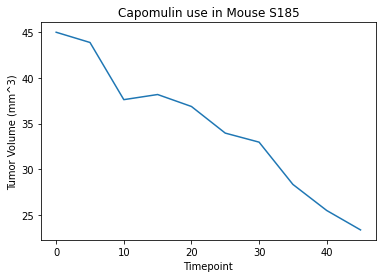

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185 = clean.loc[clean["Mouse ID"] == "s185"]
s185
times = s185["Timepoint"]
s185_tumor_vol = s185["Tumor Volume (mm3)"]

plt.plot(times,s185_tumor_vol)
plt.title("Capomulin use in Mouse S185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm^3)")
plt.show()

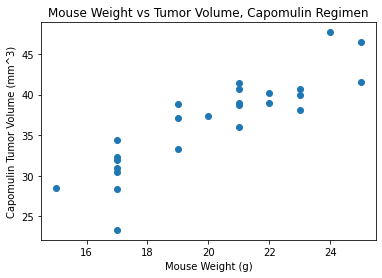

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean.loc[clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").last().reset_index()
capomulin
cap_tumor_vol = capomulin["Tumor Volume (mm3)"]
mouse_weight = capomulin["Weight (g)"]
plt.scatter(mouse_weight,cap_tumor_vol)
plt.title("Mouse Weight vs Tumor Volume, Capomulin Regimen")
plt.ylabel('Capomulin Tumor Volume (mm^3)')
plt.xlabel('Mouse Weight (g)')
plt.show()

## Correlation and Regression

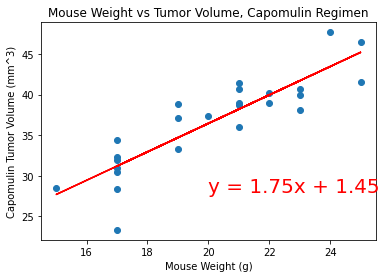

The correlation between tumor volume and mouse weight is 0.88


In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight
y_values = cap_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(20,28),fontsize=20,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(mouse_weight,cap_tumor_vol)
plt.title("Mouse Weight vs Tumor Volume, Capomulin Regimen")
plt.ylabel('Capomulin Tumor Volume (mm^3)')
plt.xlabel('Mouse Weight (g)')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between tumor volume and mouse weight is {round(correlation[0],2)}")

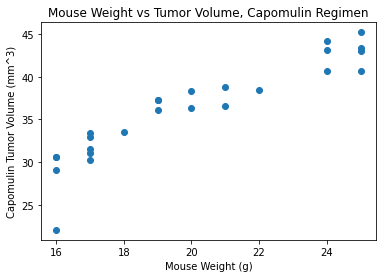

In [31]:
ramicane = clean.loc[clean["Drug Regimen"] == "Ramicane"].groupby("Mouse ID").last().reset_index()
ramicane
ram_tumor_vol = ramicane["Tumor Volume (mm3)"]
ram_mouse_weight = ramicane["Weight (g)"]
plt.scatter(ram_mouse_weight,ram_tumor_vol)
plt.title("Mouse Weight vs Tumor Volume, Capomulin Regimen")
plt.ylabel('Capomulin Tumor Volume (mm^3)')
plt.xlabel('Mouse Weight (g)')
plt.show()

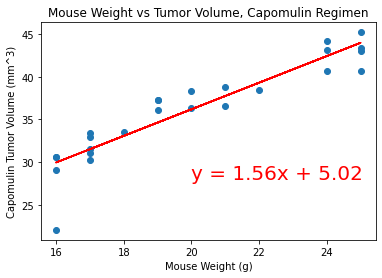

The correlation between tumor volume and mouse weight is 0.92


In [32]:
x_values = ram_mouse_weight
y_values = ram_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(20,28),fontsize=20,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(ram_mouse_weight,ram_tumor_vol)
plt.title("Mouse Weight vs Tumor Volume, Capomulin Regimen")
plt.ylabel('Capomulin Tumor Volume (mm^3)')
plt.xlabel('Mouse Weight (g)')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between tumor volume and mouse weight is {round(correlation[0],2)}")